In [4]:
#########################
# read all files from get_familiar
# save them in a dictionary of datasets

import pandas as pd
import os

data_dir = '../d1_get_familiar/data/get_familiar'
datasets = {}

for file in os.listdir(data_dir):
    if file.endswith('.feather'):
        dataset_name = file[:file.index('_person')]
        datasets[dataset_name] = pd.read_feather(os.path.join(data_dir, file))


In [5]:
# the names of the datasets
print(datasets.keys(), '\n')
# check the sizes of datasets
total_size = 0
for name, df in datasets.items():
    size = df.memory_usage(deep=True).sum()
    total_size += size
    print(f"Dataset '{name}' size: {size / (1024 ** 2):.2f} MB")
print(f"\nTotal size of all datasets: {total_size / (1024 ** 2):.2f} MB")

dict_keys(['summary', 'glucose', 'insulin', 'breathing', 'accel', 'ecg']) 

Dataset 'summary' size: 6.94 MB
Dataset 'glucose' size: 0.10 MB
Dataset 'insulin' size: 0.00 MB
Dataset 'breathing' size: 9.91 MB
Dataset 'accel' size: 79.30 MB
Dataset 'ecg' size: 99.12 MB

Total size of all datasets: 195.37 MB


In [6]:
# measured every 4 microseconds
print(datasets['ecg'].info())
datasets['ecg']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6496000 entries, 2014-10-04 06:34:57.423000 to 2014-10-04 13:48:01.419000
Data columns (total 1 columns):
 #   Column       Dtype
---  ------       -----
 0   EcgWaveform  int64
dtypes: int64(1)
memory usage: 99.1 MB
None


,EcgWaveform
datetime,
2014-10-04 06:34:57.423,297
2014-10-04 06:34:57.427,297
2014-10-04 06:34:57.431,297
2014-10-04 06:34:57.435,297
2014-10-04 06:34:57.439,297
...,...
2014-10-04 13:48:01.403,1956
2014-10-04 13:48:01.407,1956
2014-10-04 13:48:01.411,1957


<Axes: title={'center': 'ECG Signal (First 5000 samples)'}, xlabel='datetime'>

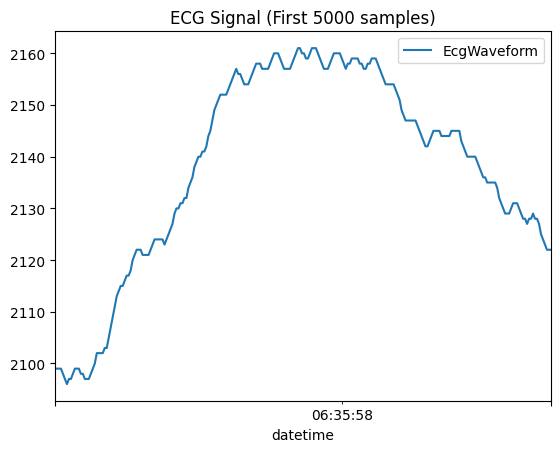

In [7]:
datasets ['ecg'].iloc[15000:15250].plot(y='EcgWaveform', title='ECG Signal (First 5000 samples)')

In [8]:
# lots of aggregated measures including SKIN TEMP, HRV, etc.
# measured every 1 second for ONE DAY

print(datasets['summary'].info())
datasets['summary']


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25984 entries, 2014-10-04 06:34:57.423000 to 2014-10-04 13:48:00.423000
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                25984 non-null  int64  
 1   BR                25984 non-null  float64
 2   SkinTemp          25984 non-null  float64
 3   Posture           25984 non-null  int64  
 4   Activity          25984 non-null  float64
 5   PeakAccel         25984 non-null  float64
 6   BatteryVolts      25984 non-null  float64
 7   BatteryLevel      25984 non-null  int64  
 8   BRAmplitude       25984 non-null  float64
 9   BRNoise           25984 non-null  float64
 10  BRConfidence      25984 non-null  int64  
 11  ECGAmplitude      25984 non-null  float64
 12  ECGNoise          25984 non-null  float64
 13  HRConfidence      25984 non-null  int64  
 14  HRV               25984 non-null  int64  
 15  SystemConfidence  25984 non-null  int6

,HR,BR,SkinTemp,Posture,Activity,PeakAccel,BatteryVolts,BatteryLevel,BRAmplitude,BRNoise,...,SagittalPeak,DeviceTemp,StatusInfo,LinkQuality,RSSI,TxPower,CoreTemp,AuxADC1,AuxADC2,AuxADC3
datetime,,,,,,,,,,,,,,,,,,,,,
2014-10-04 06:34:57.423,65,8.1,-3276.8,-61,0.60,1.46,4.166,94,6046.0,65535.0,...,1.31,27.1,528,255,-128,-128,6553.5,414,422,484
2014-10-04 06:34:58.423,65,8.1,-3276.8,-49,0.54,0.92,4.166,94,5350.0,65535.0,...,0.93,27.1,528,255,-128,-128,6553.5,415,423,483
2014-10-04 06:34:59.423,65,7.3,-3276.8,-22,0.68,1.09,4.166,94,4673.0,65535.0,...,0.24,27.1,528,255,-128,-128,6553.5,425,431,485
2014-10-04 06:35:00.423,65,7.3,-3276.8,22,0.39,0.56,4.166,94,4025.0,65535.0,...,-0.24,27.1,528,255,-128,-128,6553.5,416,423,483
2014-10-04 06:35:01.423,65,6.6,-3276.8,27,0.35,0.86,4.166,94,3500.0,65535.0,...,-0.06,27.1,528,255,-128,-128,6553.5,412,419,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-04 13:47:56.423,0,18.4,-3276.8,-7,0.07,0.10,3.888,48,67.0,65535.0,...,0.22,32.4,531,255,-128,-128,35.3,409,419,461
2014-10-04 13:47:57.423,0,17.7,-3276.8,-7,0.07,0.08,3.888,48,60.0,65535.0,...,0.12,32.4,531,255,-128,-128,35.3,414,420,483
2014-10-04 13:47:58.423,0,17.7,-3276.8,-7,0.05,0.08,3.888,48,53.0,65535.0,...,0.12,32.4,531,255,-128,-128,35.3,419,424,486


In [9]:
print(datasets['glucose'].info())
datasets['glucose']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1438 entries, 2014-10-01 19:14:00 to 2014-10-06 16:54:02
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   glucose  1438 non-null   float64
 1   type     1438 non-null   object 
dtypes: float64(1), object(1)
memory usage: 33.7+ KB
None


,glucose,type
datetime,,
2014-10-01 19:14:00,10.3,cgm
2014-10-01 19:19:00,9.9,cgm
2014-10-01 19:23:00,9.4,manual
2014-10-01 19:24:00,9.8,cgm
2014-10-01 19:29:00,9.6,cgm
...,...,...
2014-10-06 16:34:02,12.3,cgm
2014-10-06 16:39:02,12.5,cgm
2014-10-06 16:44:02,12.5,cgm


In [10]:
datasets['glucose'].query('glucose < 3.9')

,glucose,type
datetime,,
2014-10-03 03:54:00,3.8,cgm
2014-10-03 03:59:00,3.6,cgm
2014-10-03 04:04:00,3.5,cgm
2014-10-03 04:09:00,3.4,cgm
2014-10-03 04:14:00,3.2,cgm
...,...,...
2014-10-06 12:34:02,3.3,cgm
2014-10-06 12:39:02,3.3,cgm
2014-10-06 12:44:02,3.3,cgm


In [11]:
#print(datasets['insulin'].info())
datasets ['insulin'] #.iloc[15000:15250].plot

,fast_insulin,slow_insulin
datetime,,
2014-10-01 10:06:00,7,NaN
2014-10-01 16:50:00,4,NaN
2014-10-01 19:28:00,6,NaN
2014-10-01 22:27:00,8,NaN
2014-10-01 23:48:00,0,31.0
2014-10-02 00:45:00,2,NaN
2014-10-02 10:10:00,3,NaN
2014-10-02 12:34:00,12,NaN
2014-10-02 21:24:00,5,NaN


In [12]:
datasets ['insulin'].isnull().sum()

fast_insulin     0
slow_insulin    16
dtype: int64

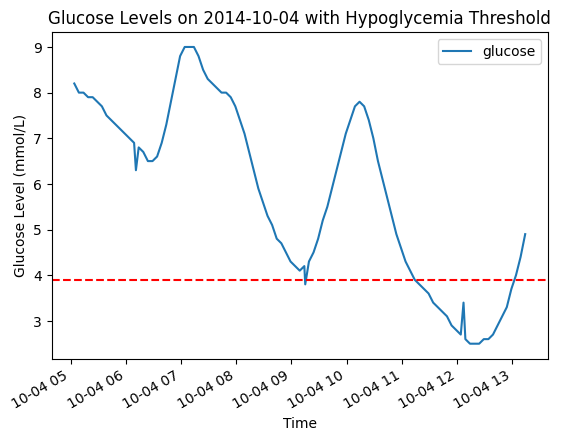

In [13]:
# subset data between 11 am an 13 pm on 2014-10-04

datasets['glucose'].loc['2014-10-04 05:00:00':'2014-10-04 13:15:00'].plot(y='glucose')

# add a horizotnal line at glucose = 3.9
import matplotlib.pyplot as plt
plt.axhline(y=3.9, color='r', linestyle='--')
plt.title('Glucose Levels on 2014-10-04 with Hypoglycemia Threshold')
plt.xlabel('Time')
plt.ylabel('Glucose Level (mmol/L)')
plt.show()

## Chunks


In [14]:
! pip freeze | grep hypopredict

-e git+ssh://git@github.com/sasha17demin/hypopredict.git@2bf48d57e5570ea1cd6a2581b0d92aefb8117961#egg=hypopredict


In [15]:
%load_ext autoreload
%autoreload 2

In [16]:
from hypopredict import train_test_split

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# https://drive.google.com/file/d/1URua1BRmcTgkwU1nGPWRkrxhabWVotxH/view?usp=drive_link

file_id = '1URua1BRmcTgkwU1nGPWRkrxhabWVotxH'
url = f'https://drive.google.com/uc?id={file_id}&export=download'
df_tochunk = pd.read_feather(url)

In [19]:
df_tochunk

,EcgWaveform
datetime,
2014-10-04 06:34:57.423,297
2014-10-04 06:34:57.427,297
2014-10-04 06:34:57.431,297
2014-10-04 06:34:57.435,297
2014-10-04 06:34:57.439,297
...,...
2014-10-04 13:48:01.403,1956
2014-10-04 13:48:01.407,1956
2014-10-04 13:48:01.411,1957


In [20]:

###### CHUNKIFYING ######


# larger chunks => more context for model to learn from
CHUNK_SIZE = 60 * 60 * 250  # 60 minutes in number of samples

# larger step size => less overlap between chunks => less data + less overfitting
STEP_SIZE = 60*250  # 60 seconds in number of samples
# its ECG data so a 60 second slide is pretty large

chunks = train_test_split.chunkify(df_tochunk,CHUNK_SIZE,STEP_SIZE)

In [21]:
len(chunks)

434

In [22]:
chunks[0]

,EcgWaveform
datetime,
2014-10-04 06:34:57.423,297
2014-10-04 06:34:57.427,297
2014-10-04 06:34:57.431,297
2014-10-04 06:34:57.435,297
2014-10-04 06:34:57.439,297
...,...
2014-10-04 07:34:57.403,2052
2014-10-04 07:34:57.407,2051
2014-10-04 07:34:57.411,2050


In [23]:
chunks[-1]

,EcgWaveform
datetime,
2014-10-04 13:47:57.423,1985
2014-10-04 13:47:57.427,1985
2014-10-04 13:47:57.431,1985
2014-10-04 13:47:57.435,1984
2014-10-04 13:47:57.439,1982
...,...
2014-10-04 13:48:01.403,1956
2014-10-04 13:48:01.407,1956
2014-10-04 13:48:01.411,1957


In [24]:
# Load glucose data for 1 subject, all days
# https://drive.google.com/file/d/1qGfSIb9EEJ4ZxlWnBcsILgh9LbHAiMld/view?usp=share_link

file_id = '1qGfSIb9EEJ4ZxlWnBcsILgh9LbHAiMld'
url = f'https://drive.google.com/uc?id={file_id}&export=download'
gl_d1 = pd.read_feather(url) # glucose same person, all days


In [25]:
gl_d1

,glucose,type
datetime,,
2014-10-01 19:14:00,10.3,cgm
2014-10-01 19:19:00,9.9,cgm
2014-10-01 19:23:00,9.4,manual
2014-10-01 19:24:00,9.8,cgm
2014-10-01 19:29:00,9.6,cgm
...,...,...
2014-10-06 16:34:02,12.3,cgm
2014-10-06 16:39:02,12.5,cgm
2014-10-06 16:44:02,12.5,cgm


In [26]:
###### CALCULATING TARGET LABELS ######
onset_times = train_test_split.get_HG_onset_times(gl_d1)

In [27]:
onset_times

[Timestamp('2014-10-03 03:49:00'),
 Timestamp('2014-10-03 06:34:01'),
 Timestamp('2014-10-04 09:15:00'),
 Timestamp('2014-10-04 11:14:01'),
 Timestamp('2014-10-05 09:55:00'),
 Timestamp('2014-10-05 11:24:02'),
 Timestamp('2014-10-06 09:14:02'),
 Timestamp('2014-10-06 12:24:02')]

In [28]:
FORECAST_WINDOW = pd.Timedelta(minutes=30)

In [29]:
target_labels = train_test_split.generate_target_labels(chunks,
                                        onset_times=onset_times,
                                        forecast_window=FORECAST_WINDOW)

In [30]:
target_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [31]:
np.mean(target_labels)

np.float64(0.1382488479262673)

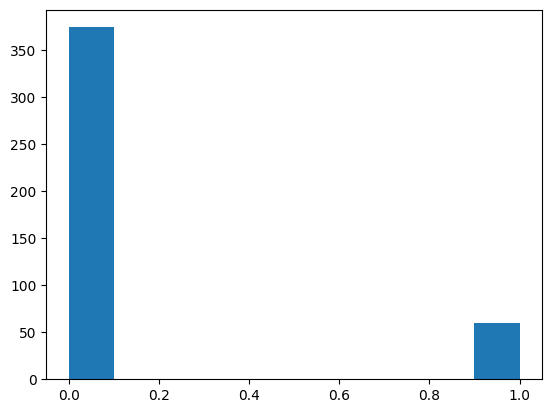

In [32]:
plt.hist(target_labels);

In [33]:
SAMPLING_RATE = 250  # Hz
TEST_SIZE = 0.2  # 20% for testing

X_train, X_test, y_train, y_test = train_test_split.train_test_split_chunks(
    chunks,
    chunk_size=CHUNK_SIZE,
    step_size=STEP_SIZE,
    target_labels=target_labels,
    forecast_window=FORECAST_WINDOW,
    sampling_rate=SAMPLING_RATE,
    test_size=TEST_SIZE
)

In [34]:
len(X_train)

256

In [35]:
len(X_test)

87

In [36]:
X_train[-1]

,EcgWaveform
datetime,
2014-10-04 10:49:57.423,2192
2014-10-04 10:49:57.427,2197
2014-10-04 10:49:57.431,2201
2014-10-04 10:49:57.435,2204
2014-10-04 10:49:57.439,2207
...,...
2014-10-04 11:49:57.403,1847
2014-10-04 11:49:57.407,1847
2014-10-04 11:49:57.411,1847


In [67]:
X_train[-1].index[-1]

Timestamp('2014-10-04 11:49:57.419000')

In [38]:
X_test[0].index[0]

Timestamp('2014-10-04 12:21:57.423000')

In [39]:
len(X_test)/len(chunks)

0.20046082949308755

In [40]:
len(X_train)/len(chunks)

0.5898617511520737

In [41]:
df_tochunk

,EcgWaveform
datetime,
2014-10-04 06:34:57.423,297
2014-10-04 06:34:57.427,297
2014-10-04 06:34:57.431,297
2014-10-04 06:34:57.435,297
2014-10-04 06:34:57.439,297
...,...
2014-10-04 13:48:01.403,1956
2014-10-04 13:48:01.407,1956
2014-10-04 13:48:01.411,1957


In [42]:

#### FEATUTE ENGINNERRING LOOP

X_train_final = pd.DataFrame()

for i in range(len(X_train)):

    descr_stat_for_chunk = X_train[i].mean().values

    ## any function you want

    X_train_final = pd.concat([X_train_final, pd.Series(descr_stat_for_chunk)], axis=0)


In [43]:
X_train[0].mean().values

array([1994.80160111])

In [44]:
type(X_train)

list

In [45]:
X_train_final

,0
0,1994.801601
0,1990.102278
0,1987.327432
0,1985.392579
0,1985.219796
...,...
0,1979.737291
0,1980.256246
0,1980.140260
0,1980.529348


In [46]:

feature_rows = []

for i in range(len(X_train)):
    chunk = X_train[i]

    # 1 compute mean per column
    feats = pd.concat(
    [
        chunk.mean().add_suffix("_mean"),
        chunk.std().add_suffix("_std"),
        chunk.min().add_suffix("_min"),
        chunk.max().add_suffix("_max"),
        chunk.quantile(0.25).add_suffix("_q25"),
        chunk.median().add_suffix("_median"),
        chunk.quantile(0.75).add_suffix("_q75"),
        chunk.skew().add_suffix("_skew"),
        chunk.kurtosis().add_suffix("_kurtosis")
    ]
)


    # 2 append to list
    feature_rows.append(feats)

# 3 list of x Series → DataFrame with x rows
X_train_features = pd.DataFrame(feature_rows)
X_train_features

,EcgWaveform_mean,EcgWaveform_std,EcgWaveform_min,EcgWaveform_max,EcgWaveform_q25,EcgWaveform_median,EcgWaveform_q75,EcgWaveform_skew,EcgWaveform_kurtosis
0,1994.801601,192.068531,6.0,4088.0,1941.0,1979.0,2015.0,2.027784,35.374922
1,1990.102278,147.017435,6.0,4088.0,1940.0,1979.0,2013.0,2.107751,32.375335
2,1987.327432,140.040414,6.0,4088.0,1940.0,1978.0,2011.0,2.055524,35.680523
3,1985.392579,135.885434,6.0,4088.0,1940.0,1978.0,2010.0,2.167978,40.124159
4,1985.219796,133.984398,6.0,4088.0,1941.0,1978.0,2008.0,2.276933,42.497851
...,...,...,...,...,...,...,...,...,...
251,1979.737291,211.138844,634.0,3831.0,1918.0,1963.0,1988.0,3.871097,25.342286
252,1980.256246,213.485176,634.0,3840.0,1918.0,1963.0,1988.0,3.955238,26.012125
253,1980.140260,210.126658,634.0,3840.0,1919.0,1963.0,1987.0,4.021723,26.837765
254,1980.529348,207.187763,634.0,3840.0,1920.0,1963.0,1987.0,4.141453,27.984778


In [47]:
#y_train_series = pd.Series(y_train, name="label")
#
##
#X_train_features = X_train_features.reset_index(drop=True)
#y_train_series = y_train_series.reset_index(drop=True)
#
#train_table = pd.concat([X_train_features, y_train_series], axis=1)
#train_table

In [48]:
# Create model using Suppot Vector Machine
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

#svm = SVC(kernel ='poly', degree=3, C=100)
#svm.fit(X_train_features, y_train)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True))
])
svm_clf.fit(X_train_features, y_train)


,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [49]:
svm_clf.predict(X_train_features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

PR-AUC: 0.9800


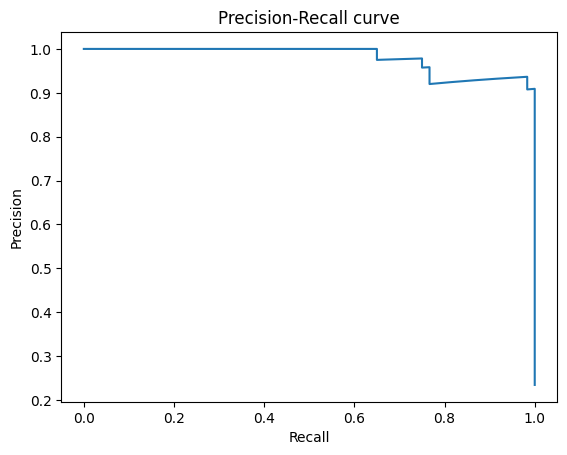

In [50]:
# I want the PR-AUC curves for my predictions

from sklearn.metrics import precision_recall_curve, auc
y_train_pred_proba = svm_clf.predict_proba(X_train_features)[:, 1]
precision, recall, _ = precision_recall_curve(y_train, y_train_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")

# plot it
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


In [51]:
feature_rows = []

for i in range(len(X_test)):
    chunk = X_test[i]

    # 1 compute mean per column
    feats = pd.concat(
    [
        chunk.mean().add_suffix("_mean"),
        chunk.std().add_suffix("_std"),
        chunk.min().add_suffix("_min"),
        chunk.max().add_suffix("_max"),
        chunk.quantile(0.25).add_suffix("_q25"),
        chunk.median().add_suffix("_median"),
        chunk.quantile(0.75).add_suffix("_q75"),
        chunk.skew().add_suffix("_skew"),
        chunk.kurtosis().add_suffix("_kurtosis")
    ]
)


    # 2 append to list
    feature_rows.append(feats)

# 3 list of x Series → DataFrame with x rows
X_test_features = pd.DataFrame(feature_rows)
X_test_features

,EcgWaveform_mean,EcgWaveform_std,EcgWaveform_min,EcgWaveform_max,EcgWaveform_q25,EcgWaveform_median,EcgWaveform_q75,EcgWaveform_skew,EcgWaveform_kurtosis
0,1981.419878,113.700492,157.0,3907.0,1953.0,1978.0,2001.0,2.537326,34.218455
1,1981.192236,113.002445,869.0,3907.0,1952.0,1978.0,2000.0,2.944858,31.156786
2,1981.378200,114.282679,869.0,3907.0,1951.0,1978.0,2001.0,3.036356,30.819956
3,1981.316801,116.738077,869.0,3907.0,1950.0,1978.0,2001.0,3.044352,29.770245
4,1981.333033,116.766462,869.0,3907.0,1950.0,1978.0,2001.0,3.041763,29.736839
...,...,...,...,...,...,...,...,...,...
82,1975.860393,242.893072,284.0,3916.0,1912.0,1970.0,2027.0,1.349558,25.995475
83,1979.118630,201.167979,284.0,3916.0,1924.0,1973.0,2021.0,0.956801,43.978571
84,1983.616452,236.713606,284.0,3916.0,1929.0,1973.0,2017.0,0.822200,33.265748
85,1987.850563,319.228721,284.0,3916.0,1943.0,1982.0,2017.0,0.598438,18.200970


PR-AUC: 0.5000


/home/abdati/.pyenv/versions/hypopredict/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


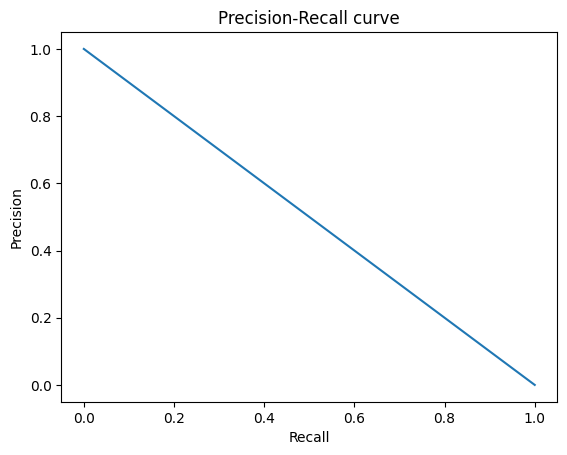

In [52]:
from sklearn.metrics import precision_recall_curve, auc
y_test_pred_proba = svm_clf.predict_proba(X_test_features)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")

# plot it
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [53]:
# save svm_clf model into pickle file
import pickle
with open('../models/dati94/svm_clf_model.pkl', 'wb') as f:
    pickle.dump(svm_clf, f)


In [54]:
# load svm_clf model from pickle file
import pickle
with open('../models/dati94/svm_clf_model.pkl', 'rb') as f:
    svm_clf_loaded = pickle.load(f)

In [55]:
svm_clf_loaded.predict(X_test_features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
def extract_features(df):
    return pd.concat([
        df.mean().add_suffix("_mean"),
        df.std().add_suffix("_std"),
        df.min().add_suffix("_min"),
        df.max().add_suffix("_max"),
        df.quantile(0.25).add_suffix("_q25"),
        df.median().add_suffix("_median"),
        df.quantile(0.75).add_suffix("_q75"),
        df.skew().add_suffix("_skew"),
        df.kurtosis().add_suffix("_kurtosis")
    ])

def expand_train_chunks(X_train, y_train, window_size_samples, step_size_samples):
    X_rows = []
    y_rows = []

    for chunk, label in zip(X_train, y_train):
        n = len(chunk)
        i = window_size_samples

        while i <= n:
            start = i - window_size_samples
            end = i
            window = chunk.iloc[start:end]
            feats = extract_features(window)
            X_rows.append(feats)
            y_rows.append(label)
            i += step_size_samples

    return pd.DataFrame(X_rows), pd.Series(y_rows)


# apply to training data
sampling_rate = 250
window_minutes = 10
window_size_samples = window_minutes * 60 * sampling_rate
step_size_samples = window_size_samples

X_train_expanded, y_train_expanded = expand_train_chunks(
    X_train, y_train, window_size_samples, step_size_samples
)

X_train_expanded

,EcgWaveform_mean,EcgWaveform_std,EcgWaveform_min,EcgWaveform_max,EcgWaveform_q25,EcgWaveform_median,EcgWaveform_q75,EcgWaveform_skew,EcgWaveform_kurtosis
0,2050.836300,356.148419,205.0,3862.0,1950.0,1989.0,2114.0,0.936314,11.111658
1,1984.292633,89.354111,339.0,3751.0,1964.0,1983.0,1999.0,3.789118,96.301174
2,1983.088247,69.442005,1277.0,3603.0,1951.0,1980.0,2008.0,2.759641,34.895591
3,1983.849067,179.029050,48.0,4088.0,1925.0,1969.0,2021.0,1.660641,28.954758
4,1981.889847,110.371848,224.0,3467.0,1937.0,1974.0,2014.0,2.567027,32.023274
...,...,...,...,...,...,...,...,...,...
1531,1980.457687,228.687652,1333.0,3819.0,1909.0,1955.0,1980.0,4.272470,26.223464
1532,1977.030220,159.729920,1601.0,3803.0,1929.0,1965.0,1981.0,4.173214,28.510563
1533,1981.220087,227.574000,1387.0,3822.0,1930.0,1972.0,1989.0,4.541565,30.310943
1534,1981.451293,153.228103,1632.0,3807.0,1939.0,1967.0,1994.0,5.559180,49.912881


In [71]:
y_train_expanded

0       0
1       0
2       0
3       0
4       0
       ..
1531    0
1532    0
1533    0
1534    0
1535    0
Length: 1536, dtype: int64

In [ ]:
svm_clf_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", degree=5, C=0.001, gamma=1000, probability=True))
])
svm_clf_2.fit(X_train_expanded, y_train_expanded)

Train PR-AUC: 0.6172


Text(0, 0.5, 'Precision')

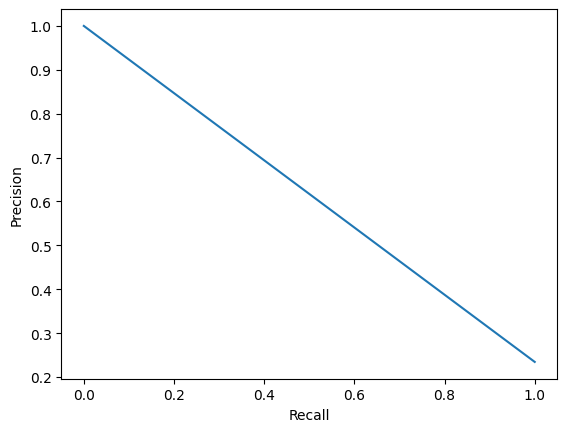

In [88]:
# print train and test PR-AUC

y_train_pred_proba_2 = svm_clf_2.predict_proba(X_train_expanded)[:, 1]
precision, recall, _ = precision_recall_curve(y_train_expanded, y_train_pred_proba_2)
pr_auc = auc(recall, precision)
print(f"Train PR-AUC: {pr_auc:.4f}")

 # Plot it
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [75]:
X_test_expanded, y_test_expanded = expand_train_chunks(
    X_test, y_test, window_size_samples, step_size_samples
)
X_test_expanded

,EcgWaveform_mean,EcgWaveform_std,EcgWaveform_min,EcgWaveform_max,EcgWaveform_q25,EcgWaveform_median,EcgWaveform_q75,EcgWaveform_skew,EcgWaveform_kurtosis
0,1981.045693,115.407401,157.0,3704.0,1958.0,1981.0,2007.0,-1.236450,47.010079
1,1981.398373,93.676595,1191.0,3907.0,1950.0,1978.0,2004.0,3.829960,57.724471
2,1981.183853,28.962900,1843.0,2452.0,1971.0,1980.0,1990.0,3.169429,42.028821
3,1980.878347,103.039582,1287.0,3367.0,1959.0,1978.0,1996.0,3.484639,34.094923
4,1981.735347,155.745174,1457.0,3861.0,1921.0,1972.0,2011.0,2.209785,11.445575
...,...,...,...,...,...,...,...,...,...
307,1983.789320,148.169904,1274.0,3818.0,1942.0,1973.0,2002.0,4.521214,41.966967
308,1982.150340,182.597468,602.0,3818.0,1933.0,1972.0,2005.0,3.275073,32.128444
309,1980.792667,177.641414,602.0,3818.0,1930.0,1972.0,2008.0,3.306275,34.449356
310,1980.597107,175.836817,602.0,3818.0,1926.0,1970.0,2010.0,3.228737,34.653800


In [76]:
svm_clf_2.predict(X_test_expanded)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Test PR-AUC: 0.5000


/home/abdati/.pyenv/versions/hypopredict/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Text(0, 0.5, 'Precision')

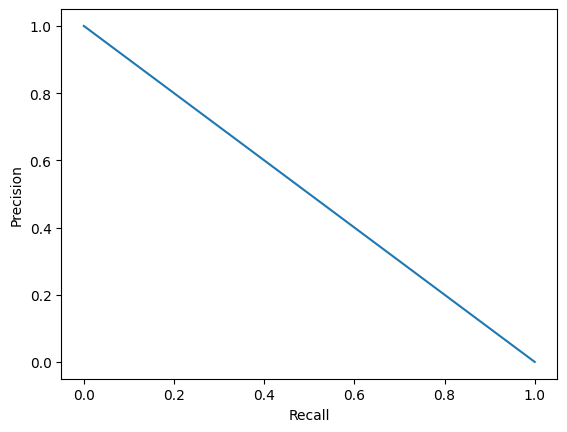

In [85]:
# print test PR-AUC
y_test_pred_proba_2 = svm_clf_2.predict_proba(X_test_expanded)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_expanded, y_test_pred_proba_2)
pr_auc = auc(recall, precision)
print(f"Test PR-AUC: {pr_auc:.4f}")
# Plot it
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')